### Librairies import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import pandas.io.json as pd_json
from pandas import json_normalize

# manage dark background
plt.style.use('ggplot')
sns.set_style("whitegrid")

### Import Format Json - API

In [2]:
import os
print(os.getcwd())
print(os.listdir(os.getcwd()))


/home/kde/workShare/projet_covid_19/Livrable
['p.html', 'styling_selections.html', 'Présentation finale test COVID 19  -Itération Finale  V1.pptx', 'COVID_ML_reprise.ipynb', 'analyse_deces_guerison_infection.ipynb', 'df_HTML.html', 'Ressources_Data', 'Fichiers_Excel', 'Dataset_ServiceRea_Geolocalisation.ipynb', 'DataSet_ML_Patient_Profile_world.ipynb', '.ipynb_checkpoints', 'Fichiers_Tableau', 'Fichiers_PowerBI', 'Dataset_ServiceREA.ipynb', 'Integration', 'webscraping_googleNews_covid.ipynb', 'Covid_ML_infection_sans_confinement.ipynb']


In [3]:
# Import DataSet initial en Json
path_local = '/home/kde/workShare/projet_covid_19/Livrable/Ressources_Data/covid_reprise_datasetcomplet.json'

with open(path_local) as data_file:    
    data = json.load(data_file)

df_initial_data = json_normalize(data)
df_initial_data

datasetid  \
0      donnees-hospitalieres-covid-19-dep-france   
1      donnees-hospitalieres-covid-19-dep-france   
2      donnees-hospitalieres-covid-19-dep-france   
3      donnees-hospitalieres-covid-19-dep-france   
4      donnees-hospitalieres-covid-19-dep-france   
...                                          ...   
38476  donnees-hospitalieres-covid-19-dep-france   
38477  donnees-hospitalieres-covid-19-dep-france   
38478  donnees-hospitalieres-covid-19-dep-france   
38479  donnees-hospitalieres-covid-19-dep-france   
38480  donnees-hospitalieres-covid-19-dep-france   

                                       recordid           record_timestamp  \
0      6a401b5a5edec751d7ac90358a2ae101dfe08aa6  2020-07-22T18:30:00+02:00   
1      335e11617f54d195574137154a0c44f91e5fa6ea  2020-07-22T18:30:00+02:00   
2      8fae58a5fbdc9dd2e714709a32b44f53634c228e  2020-07-22T18:30:00+02:00   
3      e8c04582033ddb7d28e22449b104e8987d0970f5  2020-07-22T18:30:00+02:00   
4      ed9aeafc0523f55b6b471b70c37325fb6fb01395  2020-07-22T18:30:00+02:00   
...                                         ...                        ...   
38476  3b4966d0434736318c5f8fcc7eaaafa8968e5046  2020-07-22T18:30:00+02:00   
38477  57fea7755f8865008073ec5d9e65cf340fb94283  2020-07-22T18:30:00+02:00   
38478  4f2b4555712545711a5aee5c179029c00622131a  2020-07-22T18:30:00+02:00   
38479  42f8dae51bb389234a715562a4ccdbca87e18ba3  2020-07-22T18:30:00+02:00   
38480  a73b88eb32e9de34f320d11e82cacc6545604c16  2020-07-22T18:30:00+02:00   

       fields.reg_code    fields.nom_dep_min  \
0                   94           Haute-Corse   
1                   24                Loiret   
2                   44    Meurthe-et-Moselle   
3                   53              Morbihan   
4                   75  Pyrénées-Atlantiques   
...                ...                   ...   
38476               52                Sarthe   
38477               11                 Paris   
38478               75          Haute-Vienne   
38479                1            Guadeloupe   
38480                4            La Réunion   

      fields.countrycode_iso_3166_1_alpha3    fields.region_min  \
0                                      FRA                Corse   
1                                      FRA  Centre-Val de Loire   
2                                      FRA            Grand Est   
3                                      FRA             Bretagne   
4                                      FRA   Nouvelle-Aquitaine   
...                                    ...                  ...   
38476                                  FRA     Pays de la Loire   
38477                                  FRA        Île-de-France   
38478                                  FRA   Nouvelle-Aquitaine   
38479                                  GLP           Guadeloupe   
38480                                  REU           La Réunion   

                    fields.geo_point_2d fields.sex  fields.day_intcare  ...  \
0        [42.3944507303, 9.21065397337]      Homme                   1  ...   
1        [47.9116615818, 2.34174926743]       Tous                  73  ...   
2        [48.7870120249, 6.16817758076]      Femme                  27  ...   
3        [47.8441455862, -2.8088066223]      Femme                   4  ...   
4      [43.2555265161, -0.759231599387]       Tous                  13  ...   
...                                 ...        ...                 ...  ...   
38476   [47.9939387561, 0.227666178967]      Femme                   0  ...   
38477    [48.8557954256, 2.34411308321]      Femme                   5  ...   
38478      [45.894733383, 1.2356864862]      Femme                   0  ...   
38479    [16.197646337, -61.5397927924]       Tous                   1  ...   
38480   [-21.1332035811, 55.5325090448]      Homme                   4  ...   

       fields.dep_code fields.tot_death  fields.date fields.day_hosp  \
0                   2B                4   2020-04-20               4   
1 

In [4]:
# import Màj API

url_maj_api = 'https://public.opendatasoft.com/api/records/1.0/search/?dataset=donnees-hospitalieres-covid-19-dep-france&q=&facet=date&facet=countrycode_iso_3166_1_alpha3&facet=region_min&facet=nom_dep_min&facet=sex'

requestpost = requests.get(url_maj_api)
request_json_api = requestpost.json()


In [5]:
#Code du format JSON
df_reprise_api = json_normalize(request_json_api['records'])
df_reprise_api.head()

datasetid  \
0  donnees-hospitalieres-covid-19-dep-france   
1  donnees-hospitalieres-covid-19-dep-france   
2  donnees-hospitalieres-covid-19-dep-france   
3  donnees-hospitalieres-covid-19-dep-france   
4  donnees-hospitalieres-covid-19-dep-france   

                                   recordid           record_timestamp  \
0  090741861e65f95a81a7dfc0107ebf8230daf21c  2020-07-29T16:30:00+00:00   
1  69cbb497dc0b7a33014fd32acfc7d2d4a2f613ea  2020-07-29T16:30:00+00:00   
2  ba41bae39ad4cf77c5856eb7ba7f0008ad74d435  2020-07-29T16:30:00+00:00   
3  46102ef871d6f4299e40c84df406def6583d1a5c  2020-07-29T16:30:00+00:00   
4  a0fdac9fc43fe11099c39167596d5756a1e477cd  2020-07-29T16:30:00+00:00   

   fields.reg_code fields.nom_dep_min fields.countrycode_iso_3166_1_alpha3  \
0               84             Allier                                  FRA   
1               84             Cantal                                  FRA   
2               24               Cher                                  FRA   
3               24               Cher                                  FRA   
4               53      Côtes-d'Armor                                  FRA   

      fields.region_min              fields.geo_point_2d fields.sex  \
0  Auvergne-Rhône-Alpes   [46.3935951626, 3.18694463087]      Femme   
1  Auvergne-Rhône-Alpes    [45.052550395, 2.66724467194]       Tous   
2   Centre-Val de Loire   [47.0669238688, 2.48626613029]       Tous   
3   Centre-Val de Loire   [47.0669238688, 2.48626613029]      Femme   
4              Bretagne  [48.4390612443, -2.86206319142]      Femme   

   fields.day_intcare  ...  fields.dep_code fields.tot_death  fields.date  \
0                   5  ...               03               11   2020-04-20   
1                   7  ...               15                0   2020-04-20   
2                   4  ...               18               43   2020-04-20   
3                   0  ...               18               18   2020-04-20   
4                   2  ...               22                9   2020-04-20   

  fields.day_hosp  geometry.type             geometry.coordinates  \
0              32          Point   [3.18694463087, 46.3935951626]   
1              28          Point    [2.66724467194, 45.052550395]   
2              83          Point   [2.48626613029, 47.0669238688]   
3              44          Point   [2.48626613029, 47.0669238688]   
4              34          Point  [-2.86206319142, 48.4390612443]   

  fields.day_death_new  fields.day_hosp_new  fields.day_out_new  \
0                  NaN                  NaN                 NaN   
1                  0.0                  1.0                 0.0   
2                  1.0                  1.0                 0.0   
3                  NaN                  NaN                 NaN   
4                  NaN                  NaN                 NaN   

   fields.day_intcare_new  
0                     NaN  
1                     1.0  
2                     0.0  
3                     NaN  
4                     NaN  

[5 rows x 21 columns]

### Concaténation Dataset initial et API

In [6]:
df_reprise = df_initial_data
df_reprise = pd.concat([df_reprise, df_reprise_api], ignore_index=True)
df_reprise

datasetid  \
0      donnees-hospitalieres-covid-19-dep-france   
1      donnees-hospitalieres-covid-19-dep-france   
2      donnees-hospitalieres-covid-19-dep-france   
3      donnees-hospitalieres-covid-19-dep-france   
4      donnees-hospitalieres-covid-19-dep-france   
...                                          ...   
38486  donnees-hospitalieres-covid-19-dep-france   
38487  donnees-hospitalieres-covid-19-dep-france   
38488  donnees-hospitalieres-covid-19-dep-france   
38489  donnees-hospitalieres-covid-19-dep-france   
38490  donnees-hospitalieres-covid-19-dep-france   

                                       recordid           record_timestamp  \
0      6a401b5a5edec751d7ac90358a2ae101dfe08aa6  2020-07-22T18:30:00+02:00   
1      335e11617f54d195574137154a0c44f91e5fa6ea  2020-07-22T18:30:00+02:00   
2      8fae58a5fbdc9dd2e714709a32b44f53634c228e  2020-07-22T18:30:00+02:00   
3      e8c04582033ddb7d28e22449b104e8987d0970f5  2020-07-22T18:30:00+02:00   
4      ed9aeafc0523f55b6b471b70c37325fb6fb01395  2020-07-22T18:30:00+02:00   
...                                         ...                        ...   
38486  4075f8cbd93d6d83873d0223ac636333e7fdbec5  2020-07-29T16:30:00+00:00   
38487  2f5c33cd5f4e8655370e0a380685a0808d77ed55  2020-07-29T16:30:00+00:00   
38488  de420e7d2c6d4c3eef9dee07da19347ad63bfae7  2020-07-29T16:30:00+00:00   
38489  d2705b22d4e72bd338e9ea0c9832f6212358897d  2020-07-29T16:30:00+00:00   
38490  eccebc572da0a218f5c66143f445d0f26e9c4fcd  2020-07-29T16:30:00+00:00   

       fields.reg_code    fields.nom_dep_min  \
0                   94           Haute-Corse   
1                   24                Loiret   
2                   44    Meurthe-et-Moselle   
3                   53              Morbihan   
4                   75  Pyrénées-Atlantiques   
...                ...                   ...   
38486               75                Creuse   
38487               24          Eure-et-Loir   
38488               53             Finistère   
38489               94          Corse-du-Sud   
38490                6               Mayotte   

      fields.countrycode_iso_3166_1_alpha3    fields.region_min  \
0                                      FRA                Corse   
1                                      FRA  Centre-Val de Loire   
2                                      FRA            Grand Est   
3                                      FRA             Bretagne   
4                                      FRA   Nouvelle-Aquitaine   
...                                    ...                  ...   
38486                                  FRA   Nouvelle-Aquitaine   
38487                                  FRA  Centre-Val de Loire   
38488                                  FRA             Bretagne   
38489                                  FRA                Corse   
38490                                  MYT              Mayotte   

                    fields.geo_point_2d fields.sex  fields.day_intcare  ...  \
0        [42.3944507303, 9.21065397337]      Homme                   1  ...   
1        [47.9116615818, 2.34174926743]       Tous                  73  ...   
2        [48.7870120249, 6.16817758076]      Femme                  27  ...   
3        [47.8441455862, -2.8088066223]      Femme                   4  ...   
4      [43.2555265161, -0.759231599387]       Tous                  13  ...   
...                                 ...        ...                 ...  ...   
38486    [46.0941647071, 2.02156736274]      Femme                   4  ...   
38487    [48.3904369966, 1.36981669854]       Tous                  24  ...   
38488   [48.2628706879, -4.05692098846]       Tous                  25  ...   
38489    [41.8725745076, 8.98230498246]      Femme                   3  ...   
38490   [-12.8206134401, 45.1474418557]      Femme                   0  ...   

       fields.dep_code fields.tot_death  fields.date fields.day_hosp  \
0                   2B                4   2020-04-20               4   
1 

### Choix des features à explorer

In [7]:
df_reprise.columns

Index(['datasetid', 'recordid', 'record_timestamp', 'fields.reg_code',
       'fields.nom_dep_min', 'fields.countrycode_iso_3166_1_alpha3',
       'fields.region_min', 'fields.geo_point_2d', 'fields.sex',
       'fields.day_intcare', 'fields.tot_out', 'fields.dep_code',
       'fields.tot_death', 'fields.date', 'fields.day_hosp', 'geometry.type',
       'geometry.coordinates', 'fields.day_death_new', 'fields.day_hosp_new',
       'fields.day_out_new', 'fields.day_intcare_new'],
      dtype='object')

In [8]:
df_reprise = df_reprise[['fields.nom_dep_min', 
           'fields.region_min', 'fields.geo_point_2d', 
           'fields.day_intcare', 'fields.tot_out', 
           'fields.dep_code', 'fields.tot_death',
           'fields.date', 'fields.day_hosp',
           'geometry.coordinates', 'fields.day_death_new',
            'fields.day_hosp_new',                      
           'fields.day_out_new', 'fields.day_intcare_new']]          
           

In [9]:
df_reprise.rename(columns = {'fields.nom_dep_min':'nom_dep',
                             'fields.region_min' : 'nom_region',
                             'fields.geo_point_2d':'geo_region',
                             'fields.day_intcare' : 'nb_quot_admis_rea',
                             'fields.tot_out' : 'total_retour_domicile',
                             'fields.dep_code' : 'code_dep',
                             'fields.tot_death' : 'total-deces',
                             'fields.date' : 'date',
                             'fields.day_hosp' : 'nb_actuel_patiens_hosp',
                             'geometry.coordinates' : 'geo_coord',
                             'fields.day_hosp_new' : 'new_admis_quot_hosp',
                             'fields.day_out_new' : 'new_retour_domicile',
                             'fields.day_intcare_new' : 'new_admis_rea',
                             'fields.day_death_new' : 'new_quot_deces'
                            } , inplace=True) 

/home/kde/.local/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
df_reprise

nom_dep           nom_region  \
0               Haute-Corse                Corse   
1                    Loiret  Centre-Val de Loire   
2        Meurthe-et-Moselle            Grand Est   
3                  Morbihan             Bretagne   
4      Pyrénées-Atlantiques   Nouvelle-Aquitaine   
...                     ...                  ...   
38486                Creuse   Nouvelle-Aquitaine   
38487          Eure-et-Loir  Centre-Val de Loire   
38488             Finistère             Bretagne   
38489          Corse-du-Sud                Corse   
38490               Mayotte              Mayotte   

                             geo_region  nb_quot_admis_rea  \
0        [42.3944507303, 9.21065397337]                  1   
1        [47.9116615818, 2.34174926743]                 73   
2        [48.7870120249, 6.16817758076]                 27   
3        [47.8441455862, -2.8088066223]                  4   
4      [43.2555265161, -0.759231599387]                 13   
...                                 ...                ...   
38486    [46.0941647071, 2.02156736274]                  4   
38487    [48.3904369966, 1.36981669854]                 24   
38488   [48.2628706879, -4.05692098846]                 25   
38489    [41.8725745076, 8.98230498246]                  3   
38490   [-12.8206134401, 45.1474418557]                  0   

       total_retour_domicile code_dep  total-deces        date  \
0                         43       2B            4  2020-04-20   
1                        316       45           57  2020-04-20   
2                        278       54           92  2020-04-20   
3                        107       56           28  2020-04-20   
4                        126       64           20  2020-04-20   
...                      ...      ...          ...         ...   
38486                      5       23            2  2020-04-20   
38487                    245       28           66  2020-04-20   
38488                    108       29           31  2020-04-20   
38489                     39       2A           15  2020-04-20   
38490                     20      976            1  2020-04-20   

       nb_actuel_patiens_hosp                         geo_coord  \
0                           4    [9.21065397337, 42.3944507303]   
1                         254    [2.34174926743, 47.9116615818]   
2                         205    [6.16817758076, 48.7870120249]   
3                          49    [-2.8088066223, 47.8441455862]   
4                          79  [-0.759231599387, 43.2555265161]   
...                       ...                               ...   
38486                      15    [2.02156736274, 46.0941647071]   
38487                     245    [1.36981669854, 48.3904369966]   
38488                      97   [-4.05692098846, 48.2628706879]   
38489                      36    [8.98230498246, 41.8725745076]   
38490                       3   [45.1474418557, -12.8206134401]   

       new_quot_deces  new_admis_quot_hosp  new_retour_domicile  new_admis_rea  
0                 NaN                  NaN                  NaN            NaN  
1                 2.0                  5.0                  4.0            0.0  
2                 NaN                  NaN                  NaN            NaN  
3                 NaN                  NaN                  NaN            NaN  
4                 0.0                  2.0                  1.0            0.0  
...               ...                  ...                  ...            ...  
38486             NaN                  NaN                  NaN            NaN  
38487             3.0                  3.0                 11.0            1.0  
38488             1.0                  0.0                  3.0            0.0  
38489             NaN                  NaN                  NaN            NaN  
38490             NaN                  NaN                  NaN            NaN  

[38491 rows x 14 columns]

### Export Guillaume

In [11]:
df_reprise.to_csv(r'/home/kde/workShare/projet_covid_19/Livrable/Ressources_Data/covid_reprise_conclusion.csv', index = False, header=True)

### Features d'intérêts

In [12]:
df_calcul_news = df_reprise[['nom_region', 'nom_dep', 'code_dep', 'geo_coord', 'date', 'new_admis_quot_hosp', 'new_admis_rea' ]]
df_calcul_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38491 entries, 0 to 38490
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nom_region           38491 non-null  object 
 1   nom_dep              38491 non-null  object 
 2   code_dep             38491 non-null  object 
 3   geo_coord            38491 non-null  object 
 4   date                 38491 non-null  object 
 5   new_admis_quot_hosp  12454 non-null  float64
 6   new_admis_rea        12454 non-null  float64
dtypes: float64(2), object(5)
memory usage: 2.1+ MB


In [13]:
# Remplacement des NaN qui correspondent à une valeur de non entrée à vérifier avec l'équipe
import numpy as np
#df_calcul_news['new_admis_quot_hosp'] = df_calcul_news['new_admis_quot_hosp'].replace(np.nan, 0)
#nba["College"].fillna("No College", inplace = True) 
df_calcul_news['new_admis_quot_hosp'].fillna(0.0, inplace =True)
df_calcul_news

/home/kde/.local/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


nom_region               nom_dep code_dep  \
0                    Corse           Haute-Corse       2B   
1      Centre-Val de Loire                Loiret       45   
2                Grand Est    Meurthe-et-Moselle       54   
3                 Bretagne              Morbihan       56   
4       Nouvelle-Aquitaine  Pyrénées-Atlantiques       64   
...                    ...                   ...      ...   
38486   Nouvelle-Aquitaine                Creuse       23   
38487  Centre-Val de Loire          Eure-et-Loir       28   
38488             Bretagne             Finistère       29   
38489                Corse          Corse-du-Sud       2A   
38490              Mayotte               Mayotte      976   

                              geo_coord        date  new_admis_quot_hosp  \
0        [9.21065397337, 42.3944507303]  2020-04-20                  0.0   
1        [2.34174926743, 47.9116615818]  2020-04-20                  5.0   
2        [6.16817758076, 48.7870120249]  2020-04-20                  0.0   
3        [-2.8088066223, 47.8441455862]  2020-04-20                  0.0   
4      [-0.759231599387, 43.2555265161]  2020-04-20                  2.0   
...                                 ...         ...                  ...   
38486    [2.02156736274, 46.0941647071]  2020-04-20                  0.0   
38487    [1.36981669854, 48.3904369966]  2020-04-20                  3.0   
38488   [-4.05692098846, 48.2628706879]  2020-04-20                  0.0   
38489    [8.98230498246, 41.8725745076]  2020-04-20                  0.0   
38490   [45.1474418557, -12.8206134401]  2020-04-20                  0.0   

       new_admis_rea  
0                NaN  
1                0.0  
2                NaN  
3                NaN  
4                0.0  
...              ...  
38486            NaN  
38487            1.0  
38488            0.0  
38489            NaN  
38490            NaN  

[38491 rows x 7 columns]

In [14]:
#df_calcul_news['new_admis_rea'] = 
df_calcul_news['new_admis_rea'].replace(np.nan, 0, inplace =True)
df_calcul_news


/home/kde/.local/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


nom_region               nom_dep code_dep  \
0                    Corse           Haute-Corse       2B   
1      Centre-Val de Loire                Loiret       45   
2                Grand Est    Meurthe-et-Moselle       54   
3                 Bretagne              Morbihan       56   
4       Nouvelle-Aquitaine  Pyrénées-Atlantiques       64   
...                    ...                   ...      ...   
38486   Nouvelle-Aquitaine                Creuse       23   
38487  Centre-Val de Loire          Eure-et-Loir       28   
38488             Bretagne             Finistère       29   
38489                Corse          Corse-du-Sud       2A   
38490              Mayotte               Mayotte      976   

                              geo_coord        date  new_admis_quot_hosp  \
0        [9.21065397337, 42.3944507303]  2020-04-20                  0.0   
1        [2.34174926743, 47.9116615818]  2020-04-20                  5.0   
2        [6.16817758076, 48.7870120249]  2020-04-20                  0.0   
3        [-2.8088066223, 47.8441455862]  2020-04-20                  0.0   
4      [-0.759231599387, 43.2555265161]  2020-04-20                  2.0   
...                                 ...         ...                  ...   
38486    [2.02156736274, 46.0941647071]  2020-04-20                  0.0   
38487    [1.36981669854, 48.3904369966]  2020-04-20                  3.0   
38488   [-4.05692098846, 48.2628706879]  2020-04-20                  0.0   
38489    [8.98230498246, 41.8725745076]  2020-04-20                  0.0   
38490   [45.1474418557, -12.8206134401]  2020-04-20                  0.0   

       new_admis_rea  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
38486            0.0  
38487            1.0  
38488            0.0  
38489            0.0  
38490            0.0  

[38491 rows x 7 columns]

In [15]:
df_calcul_news

nom_region               nom_dep code_dep  \
0                    Corse           Haute-Corse       2B   
1      Centre-Val de Loire                Loiret       45   
2                Grand Est    Meurthe-et-Moselle       54   
3                 Bretagne              Morbihan       56   
4       Nouvelle-Aquitaine  Pyrénées-Atlantiques       64   
...                    ...                   ...      ...   
38486   Nouvelle-Aquitaine                Creuse       23   
38487  Centre-Val de Loire          Eure-et-Loir       28   
38488             Bretagne             Finistère       29   
38489                Corse          Corse-du-Sud       2A   
38490              Mayotte               Mayotte      976   

                              geo_coord        date  new_admis_quot_hosp  \
0        [9.21065397337, 42.3944507303]  2020-04-20                  0.0   
1        [2.34174926743, 47.9116615818]  2020-04-20                  5.0   
2        [6.16817758076, 48.7870120249]  2020-04-20                  0.0   
3        [-2.8088066223, 47.8441455862]  2020-04-20                  0.0   
4      [-0.759231599387, 43.2555265161]  2020-04-20                  2.0   
...                                 ...         ...                  ...   
38486    [2.02156736274, 46.0941647071]  2020-04-20                  0.0   
38487    [1.36981669854, 48.3904369966]  2020-04-20                  3.0   
38488   [-4.05692098846, 48.2628706879]  2020-04-20                  0.0   
38489    [8.98230498246, 41.8725745076]  2020-04-20                  0.0   
38490   [45.1474418557, -12.8206134401]  2020-04-20                  0.0   

       new_admis_rea  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
38486            0.0  
38487            1.0  
38488            0.0  
38489            0.0  
38490            0.0  

[38491 rows x 7 columns]

In [16]:
# addition entre hositalisation et Rea
df_calcul_news['total_new_hosp_rea'] = df_calcul_news['new_admis_quot_hosp'] + df_calcul_news['new_admis_rea']
df_calcul_news

/home/kde/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


nom_region               nom_dep code_dep  \
0                    Corse           Haute-Corse       2B   
1      Centre-Val de Loire                Loiret       45   
2                Grand Est    Meurthe-et-Moselle       54   
3                 Bretagne              Morbihan       56   
4       Nouvelle-Aquitaine  Pyrénées-Atlantiques       64   
...                    ...                   ...      ...   
38486   Nouvelle-Aquitaine                Creuse       23   
38487  Centre-Val de Loire          Eure-et-Loir       28   
38488             Bretagne             Finistère       29   
38489                Corse          Corse-du-Sud       2A   
38490              Mayotte               Mayotte      976   

                              geo_coord        date  new_admis_quot_hosp  \
0        [9.21065397337, 42.3944507303]  2020-04-20                  0.0   
1        [2.34174926743, 47.9116615818]  2020-04-20                  5.0   
2        [6.16817758076, 48.7870120249]  2020-04-20                  0.0   
3        [-2.8088066223, 47.8441455862]  2020-04-20                  0.0   
4      [-0.759231599387, 43.2555265161]  2020-04-20                  2.0   
...                                 ...         ...                  ...   
38486    [2.02156736274, 46.0941647071]  2020-04-20                  0.0   
38487    [1.36981669854, 48.3904369966]  2020-04-20                  3.0   
38488   [-4.05692098846, 48.2628706879]  2020-04-20                  0.0   
38489    [8.98230498246, 41.8725745076]  2020-04-20                  0.0   
38490   [45.1474418557, -12.8206134401]  2020-04-20                  0.0   

       new_admis_rea  total_new_hosp_rea  
0                0.0                 0.0  
1                0.0                 5.0  
2                0.0                 0.0  
3                0.0                 0.0  
4                0.0                 2.0  
...              ...                 ...  
38486            0.0                 0.0  
38487            1.0                 4.0  
38488            0.0                 0.0  
38489            0.0                 0.0  
38490            0.0                 0.0  

[38491 rows x 8 columns]

In [17]:
df_calcul_news['nom_region'].unique()

array(['Corse', 'Centre-Val de Loire', 'Grand Est', 'Bretagne',
       'Nouvelle-Aquitaine', 'Bourgogne-Franche-Comté',
       'Pays de la Loire', 'Île-de-France', 'Auvergne-Rhône-Alpes',
       'Occitanie', 'Normandie', 'Hauts-de-France',
       "Provence-Alpes-Côte d'Azur", 'Mayotte', 'Martinique',
       'Guadeloupe', 'La Réunion', 'Guyane'], dtype=object)

In [18]:
df_reduit = df_calcul_news.loc[(df_calcul_news['nom_region'] == 'Nouvelle-Aquitaine')] #| (df_calcul_news['nom_region'] == 'Bretagne') | (df_calcul_news['nom_region'] == Pays de la Loire')]
df_reduit

nom_region               nom_dep code_dep  \
4      Nouvelle-Aquitaine  Pyrénées-Atlantiques       64   
28     Nouvelle-Aquitaine           Deux-Sèvres       79   
29     Nouvelle-Aquitaine                Vienne       86   
35     Nouvelle-Aquitaine               Corrèze       19   
40     Nouvelle-Aquitaine                Landes       40   
...                   ...                   ...      ...   
38462  Nouvelle-Aquitaine              Charente       16   
38468  Nouvelle-Aquitaine          Haute-Vienne       87   
38472  Nouvelle-Aquitaine               Gironde       33   
38478  Nouvelle-Aquitaine          Haute-Vienne       87   
38486  Nouvelle-Aquitaine                Creuse       23   

                              geo_coord        date  new_admis_quot_hosp  \
4      [-0.759231599387, 43.2555265161]  2020-04-20                  2.0   
28     [-0.316295053643, 46.5507560865]  2020-04-22                  0.0   
29      [0.462231269996, 46.5638983824]  2020-04-22                  3.0   
35       [1.87657009296, 45.3569109959]  2020-04-23                  0.0   
40      [-0.78938928305, 43.9678995107]  2020-04-23                  0.0   
...                                 ...         ...                  ...   
38462    [0.198420146721, 45.715094339]  2020-07-21                  0.0   
38468      [1.2356864862, 45.894733383]  2020-07-21                  0.0   
38472  [-0.581014218898, 44.8370033803]  2020-07-22                  0.0   
38478      [1.2356864862, 45.894733383]  2020-07-22                  0.0   
38486    [2.02156736274, 46.0941647071]  2020-04-20                  0.0   

       new_admis_rea  total_new_hosp_rea  
4                0.0                 2.0  
28               0.0                 0.0  
29               0.0                 3.0  
35               0.0                 0.0  
40               0.0                 0.0  
...              ...                 ...  
38462            0.0                 0.0  
38468            0.0                 0.0  
38472            0.0                 0.0  
38478            0.0                 0.0  
38486            0.0                 0.0  

[4573 rows x 8 columns]

/home/kde/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


TypeError: an integer is required (got type tuple)

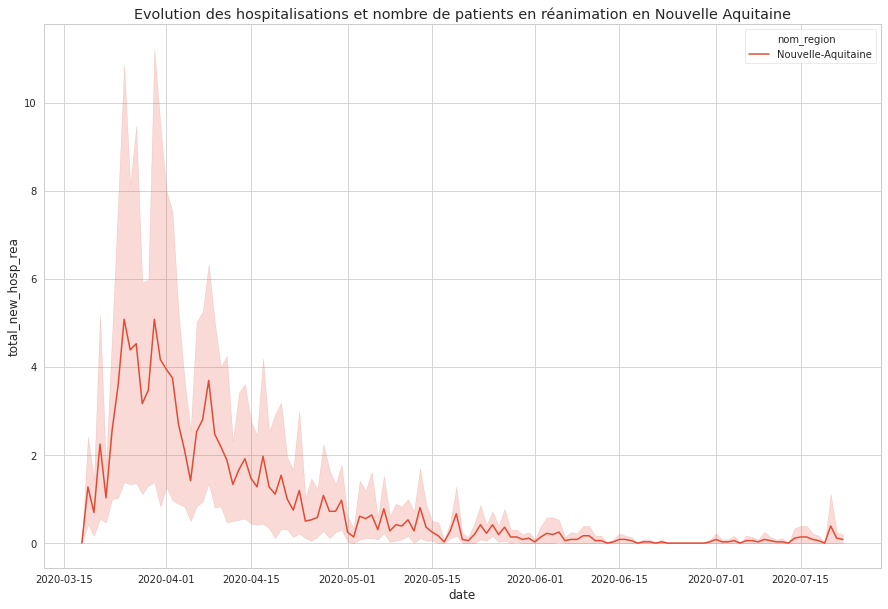

In [19]:
# Contrôle des courbes d'évolution : voir demain avec Bokeh
from datetime import datetime

df_reduit["date"]=pd.to_datetime(df_reduit["date"])


plt.figure (figsize=(15,10))
sns.lineplot(x='date', y= 'total_new_hosp_rea', hue='nom_region', data=df_reduit).set_title('Evolution des hospitalisations et nombre de patients en réanimation en Nouvelle Aquitaine')
plt.xlim(datetime((2020, 3, 1), datetime(2020, 7, 23)))
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.show()

#### Conversion des dates en jour

In [20]:
# convertir des dates en jour
df_reduit['date_convert'] = df_reduit['date'].dt.dayofyear
df_reduit

/home/kde/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


nom_region               nom_dep code_dep  \
4      Nouvelle-Aquitaine  Pyrénées-Atlantiques       64   
28     Nouvelle-Aquitaine           Deux-Sèvres       79   
29     Nouvelle-Aquitaine                Vienne       86   
35     Nouvelle-Aquitaine               Corrèze       19   
40     Nouvelle-Aquitaine                Landes       40   
...                   ...                   ...      ...   
38462  Nouvelle-Aquitaine              Charente       16   
38468  Nouvelle-Aquitaine          Haute-Vienne       87   
38472  Nouvelle-Aquitaine               Gironde       33   
38478  Nouvelle-Aquitaine          Haute-Vienne       87   
38486  Nouvelle-Aquitaine                Creuse       23   

                              geo_coord       date  new_admis_quot_hosp  \
4      [-0.759231599387, 43.2555265161] 2020-04-20                  2.0   
28     [-0.316295053643, 46.5507560865] 2020-04-22                  0.0   
29      [0.462231269996, 46.5638983824] 2020-04-22                  3.0   
35       [1.87657009296, 45.3569109959] 2020-04-23                  0.0   
40      [-0.78938928305, 43.9678995107] 2020-04-23                  0.0   
...                                 ...        ...                  ...   
38462    [0.198420146721, 45.715094339] 2020-07-21                  0.0   
38468      [1.2356864862, 45.894733383] 2020-07-21                  0.0   
38472  [-0.581014218898, 44.8370033803] 2020-07-22                  0.0   
38478      [1.2356864862, 45.894733383] 2020-07-22                  0.0   
38486    [2.02156736274, 46.0941647071] 2020-04-20                  0.0   

       new_admis_rea  total_new_hosp_rea  date_convert  
4                0.0                 2.0           111  
28               0.0                 0.0           113  
29               0.0                 3.0           113  
35               0.0                 0.0           114  
40               0.0                 0.0           114  
...              ...                 ...           ...  
38462            0.0                 0.0           203  
38468            0.0                 0.0           203  
38472            0.0                 0.0           204  
38478            0.0                 0.0           204  
38486            0.0                 0.0           111  

[4573 rows x 9 columns]

#### Prédiction : preprocessing

In [21]:
# Faire la prédiction sur 1 mois avec les date en jour.
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import accuracy_score

# Feature
X = df_reduit[['date_convert']]
y = df_reduit['total_new_hosp_rea']



#polynomial regression
polyn = PolynomialFeatures(degree=3)
Xpoly = polyn.fit_transform(X) #x_ contient les degrés et produits croisés

X_train , X_test , y_train , y_test  =  train_test_split ( Xpoly , y , test_size = 0.2 , random_state = 0 )

model_LR= linear_model.LinearRegression().fit(X_train, y_train)
y_pred = model_LR.predict(X_test)

# L'accuracy_score ne prend que des valeurs dicrète et non continue d'ou le Y_pred.round().
accuracy_test = accuracy_score(y_test, y_pred.round())
print("Result accuracy test :", accuracy_test)

prediction = model_LR.predict(Xpoly)
df_reduit['prediction_malade'] = prediction
df_reduit

Result accuracy test : 0.5202185792349727


/home/kde/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


nom_region               nom_dep code_dep  \
4      Nouvelle-Aquitaine  Pyrénées-Atlantiques       64   
28     Nouvelle-Aquitaine           Deux-Sèvres       79   
29     Nouvelle-Aquitaine                Vienne       86   
35     Nouvelle-Aquitaine               Corrèze       19   
40     Nouvelle-Aquitaine                Landes       40   
...                   ...                   ...      ...   
38462  Nouvelle-Aquitaine              Charente       16   
38468  Nouvelle-Aquitaine          Haute-Vienne       87   
38472  Nouvelle-Aquitaine               Gironde       33   
38478  Nouvelle-Aquitaine          Haute-Vienne       87   
38486  Nouvelle-Aquitaine                Creuse       23   

                              geo_coord       date  new_admis_quot_hosp  \
4      [-0.759231599387, 43.2555265161] 2020-04-20                  2.0   
28     [-0.316295053643, 46.5507560865] 2020-04-22                  0.0   
29      [0.462231269996, 46.5638983824] 2020-04-22                  3.0   
35       [1.87657009296, 45.3569109959] 2020-04-23                  0.0   
40      [-0.78938928305, 43.9678995107] 2020-04-23                  0.0   
...                                 ...        ...                  ...   
38462    [0.198420146721, 45.715094339] 2020-07-21                  0.0   
38468      [1.2356864862, 45.894733383] 2020-07-21                  0.0   
38472  [-0.581014218898, 44.8370033803] 2020-07-22                  0.0   
38478      [1.2356864862, 45.894733383] 2020-07-22                  0.0   
38486    [2.02156736274, 46.0941647071] 2020-04-20                  0.0   

       new_admis_rea  total_new_hosp_rea  date_convert  prediction_malade  
4                0.0                 2.0           111           1.417081  
28               0.0                 0.0           113           1.318677  
29               0.0                 3.0           113           1.318677  
35               0.0                 0.0           114           1.270709  
40               0.0                 0.0           114           1.270709  
...              ...                 ...           ...                ...  
38462            0.0                 0.0           203           0.328354  
38468            0.0                 0.0           203           0.328354  
38472            0.0                 0.0           204           0.355523  
38478            0.0                 0.0           204           0.355523  
38486            0.0                 0.0           111           1.417081  

[4573 rows x 10 columns]

#### Analyse Graphique de la prédiction

TypeError: an integer is required (got type tuple)

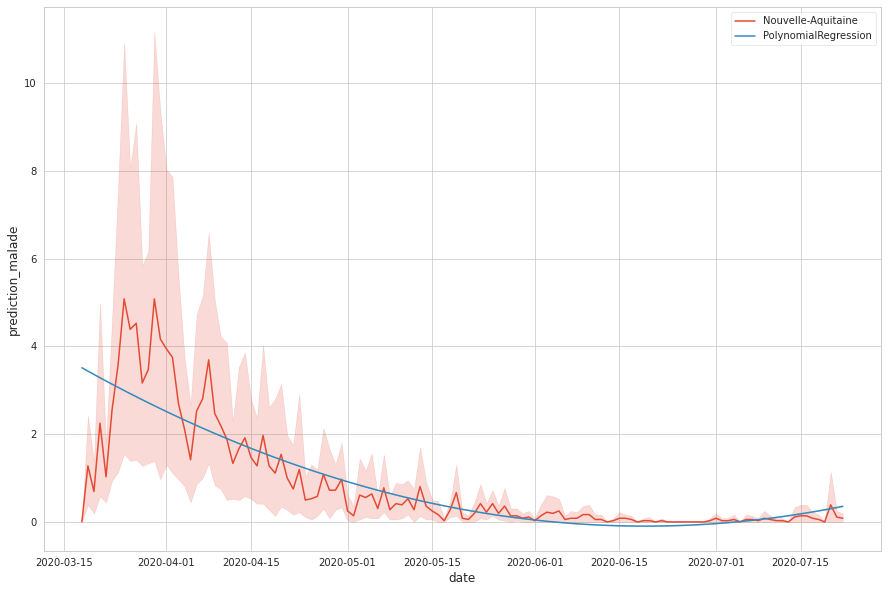

In [22]:
legend = ['Aquitaine', 'Predict']

plt.figure (figsize=(15,10))
sns.lineplot(x='date', y= 'total_new_hosp_rea', data=df_reduit, label='Nouvelle-Aquitaine')
sns.lineplot(x='date', y='prediction_malade', data=df_reduit, label='PolynomialRegression')
plt.xlim(datetime((2020,3,15), datetime(2020,7,15)))
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)
fig.suptitle('This is a somewhat long figure title', fontsize=16)
plt.show()


#### Prediction sur un mois : preporcessing

In [23]:
df_reprise_pred = df_reduit[['date', 'total_new_hosp_rea', 'date_convert', 'prediction_malade']]
df_reprise_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4573 entries, 4 to 38486
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                4573 non-null   datetime64[ns]
 1   total_new_hosp_rea  4573 non-null   float64       
 2   date_convert        4573 non-null   int64         
 3   prediction_malade   4573 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 178.6 KB


#### Insertion des nouvelles dates

In [24]:
# Ajout des dates automatiquement
#s_date = {'date':pd.date_range(start='25/07/2020', end='31/08/2020')}
 
#df_reprise_pred['new_date'] = pd.date_range(start='2020-07-25', end='2020-08-30')
data =  {'date': ['2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01',
               '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07', '2020-08-08', '2020-08-09',
               '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13',
               '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17',
               '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
               '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25',
               '2020-08-26', '2020-08-27', '2020-08-28', '2020-08-29',
               '2020-08-30', '2020-08-31']}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

# Concaténation
data_concact = pd.concat([df_reprise_pred, df], keys=['date', 'date'], ignore_index=True)
data_concact

date  total_new_hosp_rea  date_convert  prediction_malade
0    2020-04-20                 2.0         111.0           1.417081
1    2020-04-22                 0.0         113.0           1.318677
2    2020-04-22                 3.0         113.0           1.318677
3    2020-04-23                 0.0         114.0           1.270709
4    2020-04-23                 0.0         114.0           1.270709
...         ...                 ...           ...                ...
4606 2020-08-27                 NaN           NaN                NaN
4607 2020-08-28                 NaN           NaN                NaN
4608 2020-08-29                 NaN           NaN                NaN
4609 2020-08-30                 NaN           NaN                NaN
4610 2020-08-31                 NaN           NaN                NaN

[4611 rows x 4 columns]

In [25]:
data_concact['date_convert'].fillna(data_concact['date'].dt.dayofyear, inplace =True)
data_concact['date_convert'] = data_concact['date_convert'].astype(int)
data_concact

date  total_new_hosp_rea  date_convert  prediction_malade
0    2020-04-20                 2.0           111           1.417081
1    2020-04-22                 0.0           113           1.318677
2    2020-04-22                 3.0           113           1.318677
3    2020-04-23                 0.0           114           1.270709
4    2020-04-23                 0.0           114           1.270709
...         ...                 ...           ...                ...
4606 2020-08-27                 NaN           240                NaN
4607 2020-08-28                 NaN           241                NaN
4608 2020-08-29                 NaN           242                NaN
4609 2020-08-30                 NaN           243                NaN
4610 2020-08-31                 NaN           244                NaN

[4611 rows x 4 columns]

#### Prediction sur 1 mois

In [26]:
# Ici je n'ai besoin que de reprendre la colonne indépante du X pour prédire la colonne dépendante y.
X = data_concact[['date_convert']]

#polynomial regression
polyn = PolynomialFeatures(degree=3)
Xpred = polyn.fit_transform(X) #x_ contient les degrés et produits croisés

y_pred = model_LR.predict(Xpred)
data_concact['prediction_malade_2'] = y_pred


In [27]:
data_concact

date  total_new_hosp_rea  date_convert  prediction_malade  \
0    2020-04-20                 2.0           111           1.417081   
1    2020-04-22                 0.0           113           1.318677   
2    2020-04-22                 3.0           113           1.318677   
3    2020-04-23                 0.0           114           1.270709   
4    2020-04-23                 0.0           114           1.270709   
...         ...                 ...           ...                ...   
4606 2020-08-27                 NaN           240                NaN   
4607 2020-08-28                 NaN           241                NaN   
4608 2020-08-29                 NaN           242                NaN   
4609 2020-08-30                 NaN           243                NaN   
4610 2020-08-31                 NaN           244                NaN   

      prediction_malade_2  
0                1.417081  
1                1.318677  
2                1.318677  
3                1.270709  
4                1.270709  
...                   ...  
4606             1.900111  
4607             1.958818  
4608             2.018382  
4609             2.078804  
4610             2.140084  

[4611 rows x 5 columns]

TypeError: an integer is required (got type tuple)

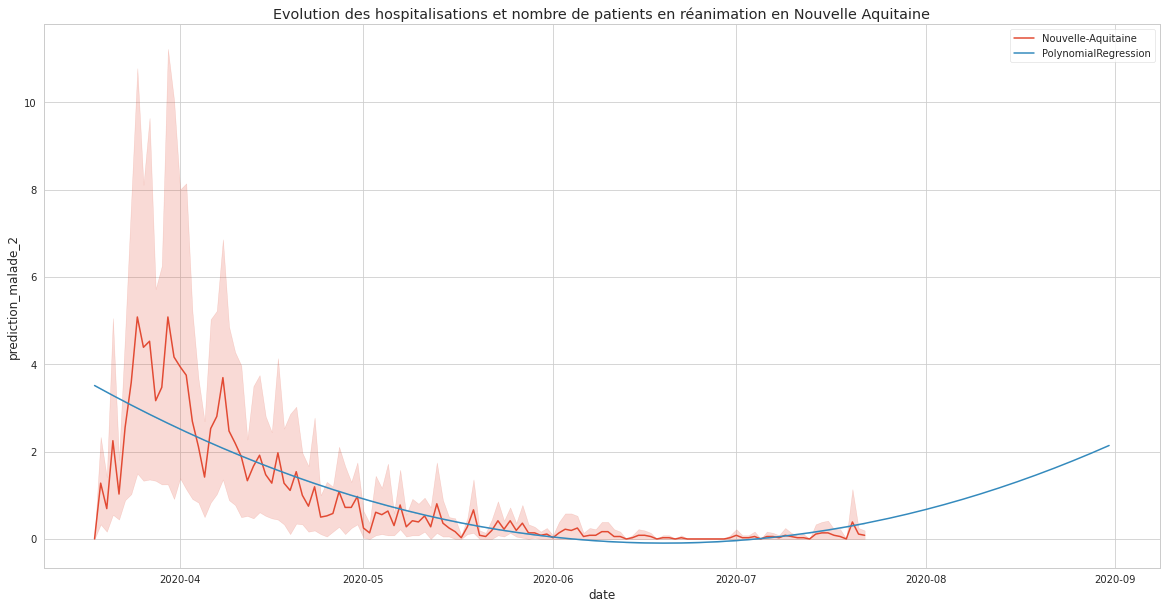

In [28]:
legend = ['Aquitaine', 'Predict']

plt.figure (figsize=(20,10))
sns.lineplot(x='date', y= 'total_new_hosp_rea', data=df_reduit, label='Nouvelle-Aquitaine').set_title('Evolution des hospitalisations et nombre de patients en réanimation en Nouvelle Aquitaine')
sns.lineplot(x='date', y='prediction_malade_2', data=data_concact, label='PolynomialRegression')
plt.xlim(datetime((2020,3,15), datetime(2020,8,15)))
plt.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.set_title('Prédiction de reprise des cas covid pour le mois d\'août')
plt.set_xlabel('Dates')
plt.show()

#### Prédiction réalisée par Guillaume sur le non confinement : réalisé avec numpy et fit

In [ ]:
Xaxis = df_covid['Dates_Num'] 
Yaxis = df_covid['Décès_Cum']

model_covid_LRS = np.polyfit(x = Xaxis, y = Yaxis, deg = 1)

np.poly1d(model_covid_LRS)(132)
listtest = [132]
 np.poly1d(model_covid_LRS)(listtest)

polymodel = np.polyfit(x = Xaxis, y = Yaxis, deg = 3)

Xmin = Xaxis.min()
Xmax = Xaxis.max()             
array1 = np.arange(Xmin, Xmax)

listtest = [91,  132]
print("NumPy list of values :  ", np.poly1d(polymodel)(listtest).round(2)   )

df_covid['PREDICTED_dates_values'] = [92,95,100,105,110,115,120,125,130,132,140,145,150,155,160,165,170,175,180,185,190]
df_covid['PREDICTED_values'] = df_covid['Dates_Num'].apply(lambda x: np.poly1d(polymodel)(x))
df_covid['PREDICTED_values2'] = df_covid['PREDICTED_dates_values'].apply(lambda x: np.poly1d(polymodel)(x))


In [ ]:
# Split à gerder pour les geospatial
'''
split_3= df_geo_copy['dateActualisation'].str.split("T", n = 1, expand = True) 
split_3
df_geo_copy["Date_actu"] = split_3[0]
df_geo_copy["time_actu"] = split_3[1]
df_geo_copy.drop(['dateActualisation', 'time_actu'], axis=1,inplace =True)
'''
